* Oskar Szudzik 148245
* Krystian Moras 148243

This is a main notebook for our second project - board game detection.

In [1]:
from PIL.ExifTags import TAGS
from PIL import Image
from ipywidgets import Video
from pprint import pprint
import random
import glob
import sys
import os
import PIL
import cv2
import numpy as np
import matplotlib.pyplot as plt
from utilities import *
%matplotlib inline


In [2]:
# mvideo = cv2.VideoCapture("quality_480/3_medium.mp4")
# if mvideo.isOpened():
#     print('Video loaded')

# mvideo_width = int(mvideo.get(3))
# mvideo_height = int(mvideo.get(4))

# print(mvideo_height, mvideo_width)

# mvideo_fps = mvideo.get(cv2.CAP_PROP_FPS)
# print(mvideo_fps)


Video

In [3]:
# Video.from_file("quality_480/3_medium.mp4")


Example frame

In [4]:
# mvideo = cv2.VideoCapture('data/dice.mp4')


In [5]:
# from matplotlib import animation
# from IPython.display import clear_output
# fig = plt.figure()
# ax = plt.axes()

# # animation function.  This is called sequentially
# def animate(i):
#     colors = ("red", "green", "blue")
#     clear_output()
#     plt.cla()
#     ret, frame = mvideo.read()
#     artists = []
#     for i in range(3):
#         histogram, bin_edges = np.histogram(frame[:, :, i], bins=256, range=(0, 256))
#        # plt.plot(histogram, color=colors[i])
#         artists.append(ax.plot(histogram,color=colors[i]))
#     return artists

# anim = animation.FuncAnimation(fig, animate, int(mvideo.get(cv2.CAP_PROP_FRAME_COUNT)))
# anim.save('histogram_dice.mp4', writer = 'ffmpeg', fps = 30)


## OBJECT TRACKING - HARDCODED - TO BE DETECTED

TO CHANGE AVI TO MP4 (enter project folder, past a following command to cmd):

In [6]:
# %ffmpeg - hide_banner - loglevel error - i easy_track_MIL.avi - y easy_track_MIL.mp4
# %ffmpeg - hide_banner - loglevel error - i medium_track_MIL.avi - y medium_track_MIL.mp4


### COUNTER DETECTION

loading video

In [7]:
mvideo = cv2.VideoCapture('process/3_easy.mp4')
if mvideo.isOpened():
    print('Video loaded')

mvideo_width = int(mvideo.get(3))
mvideo_height = int(mvideo.get(4))

print(mvideo_height, mvideo_width)

mvideo_fps = mvideo.get(cv2.CAP_PROP_FPS)
print(mvideo_fps)

mvideo.set(cv2.CAP_PROP_POS_FRAMES, 0)
ret, frame = mvideo.read()

player_bbox = (125, 535, 60, 60)
player2_bbox = (830, 1350, 50, 50)

draw_bbox(frame, player_bbox, (255, 0, 0))
draw_bbox(frame, player2_bbox, (0, 255, 255))

# imshow(frame)

Video loaded
1920 1080
29.782775466405617


In [8]:
box, crop = get_player_box(frame, frame[1375:1390, 850:865], 200, 800, inv=1, approx=0)
imshow(crop)
box

(848, 1360, 23, 31)

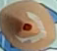

(127, 533, 56, 62)

In [9]:
mvideo = cv2.VideoCapture('process/3_easy.mp4')

ret, frame = mvideo.read()

box, crop = get_player_box(frame, frame[565:585, 150:175], 1900, 2300, inv=0, approx=5)
imshow(crop)

box

Detection

Below cell helps in finding bounds for counters

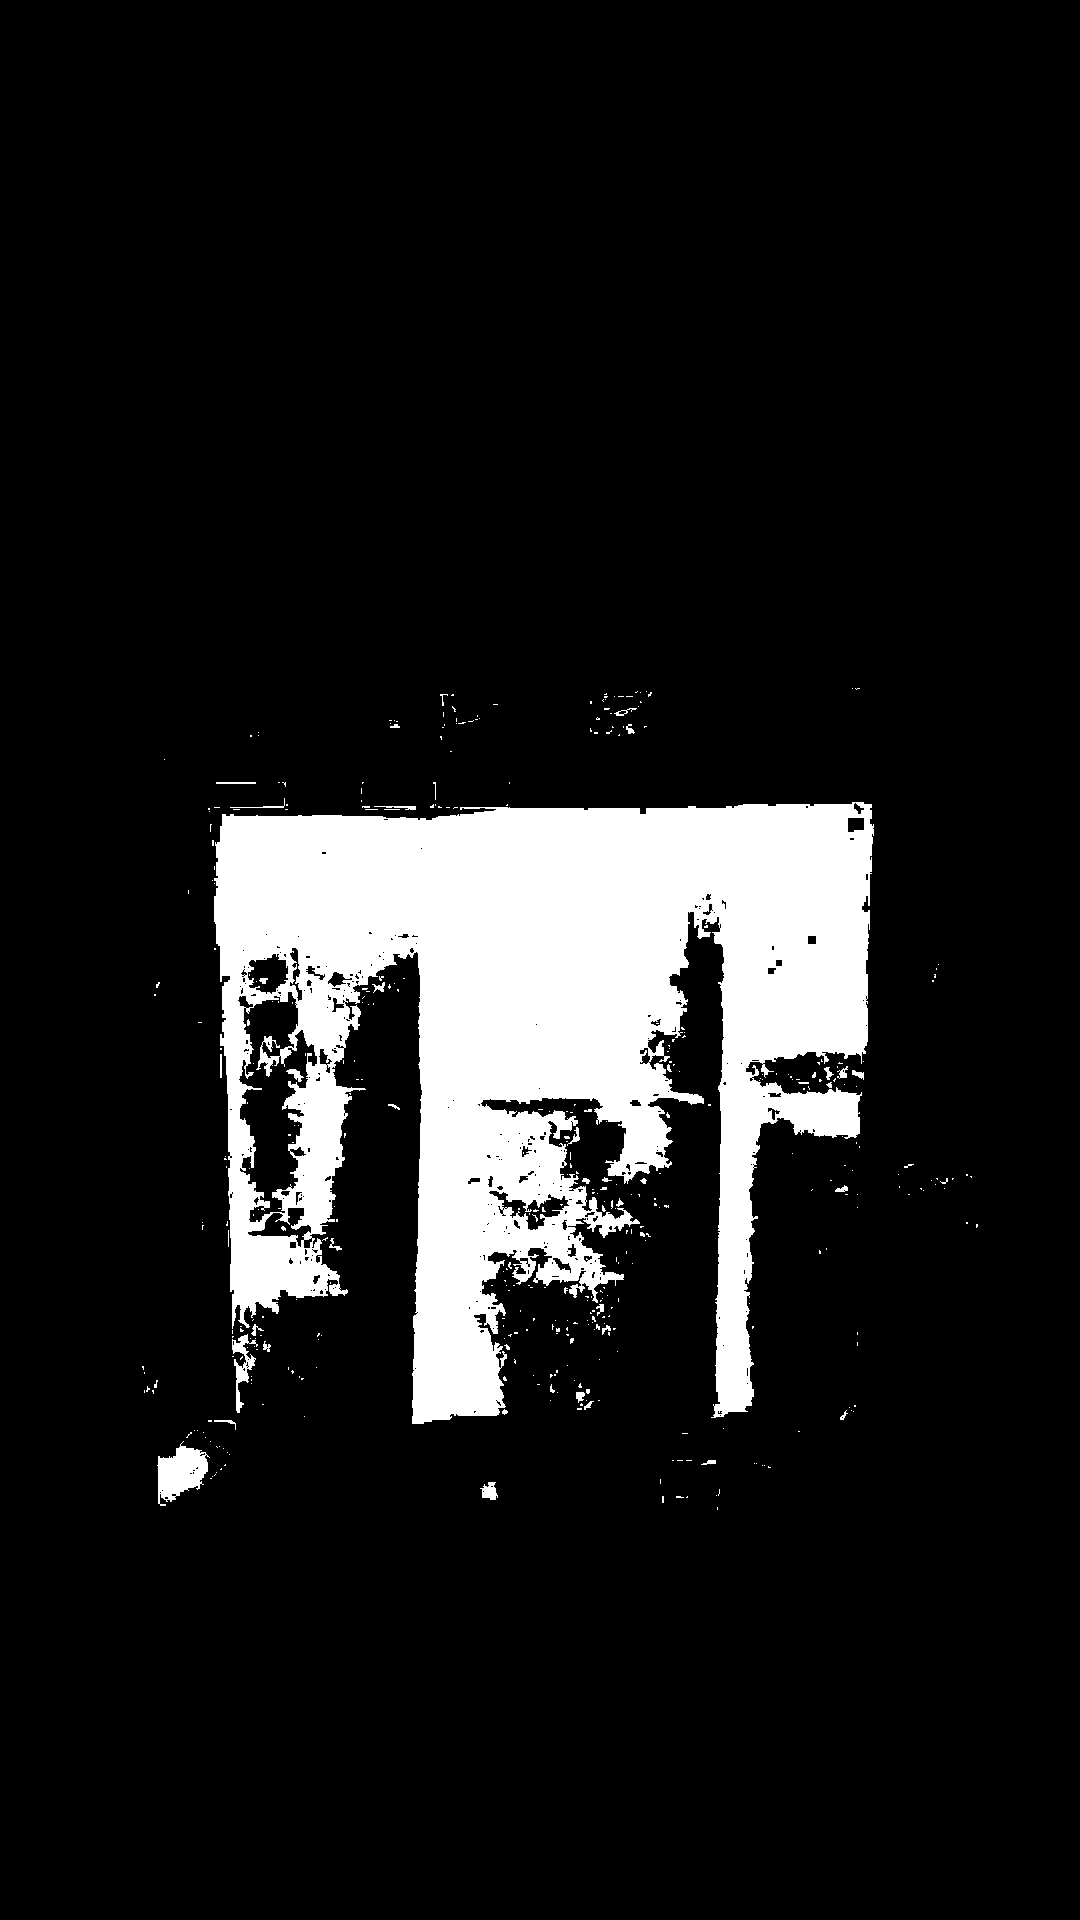

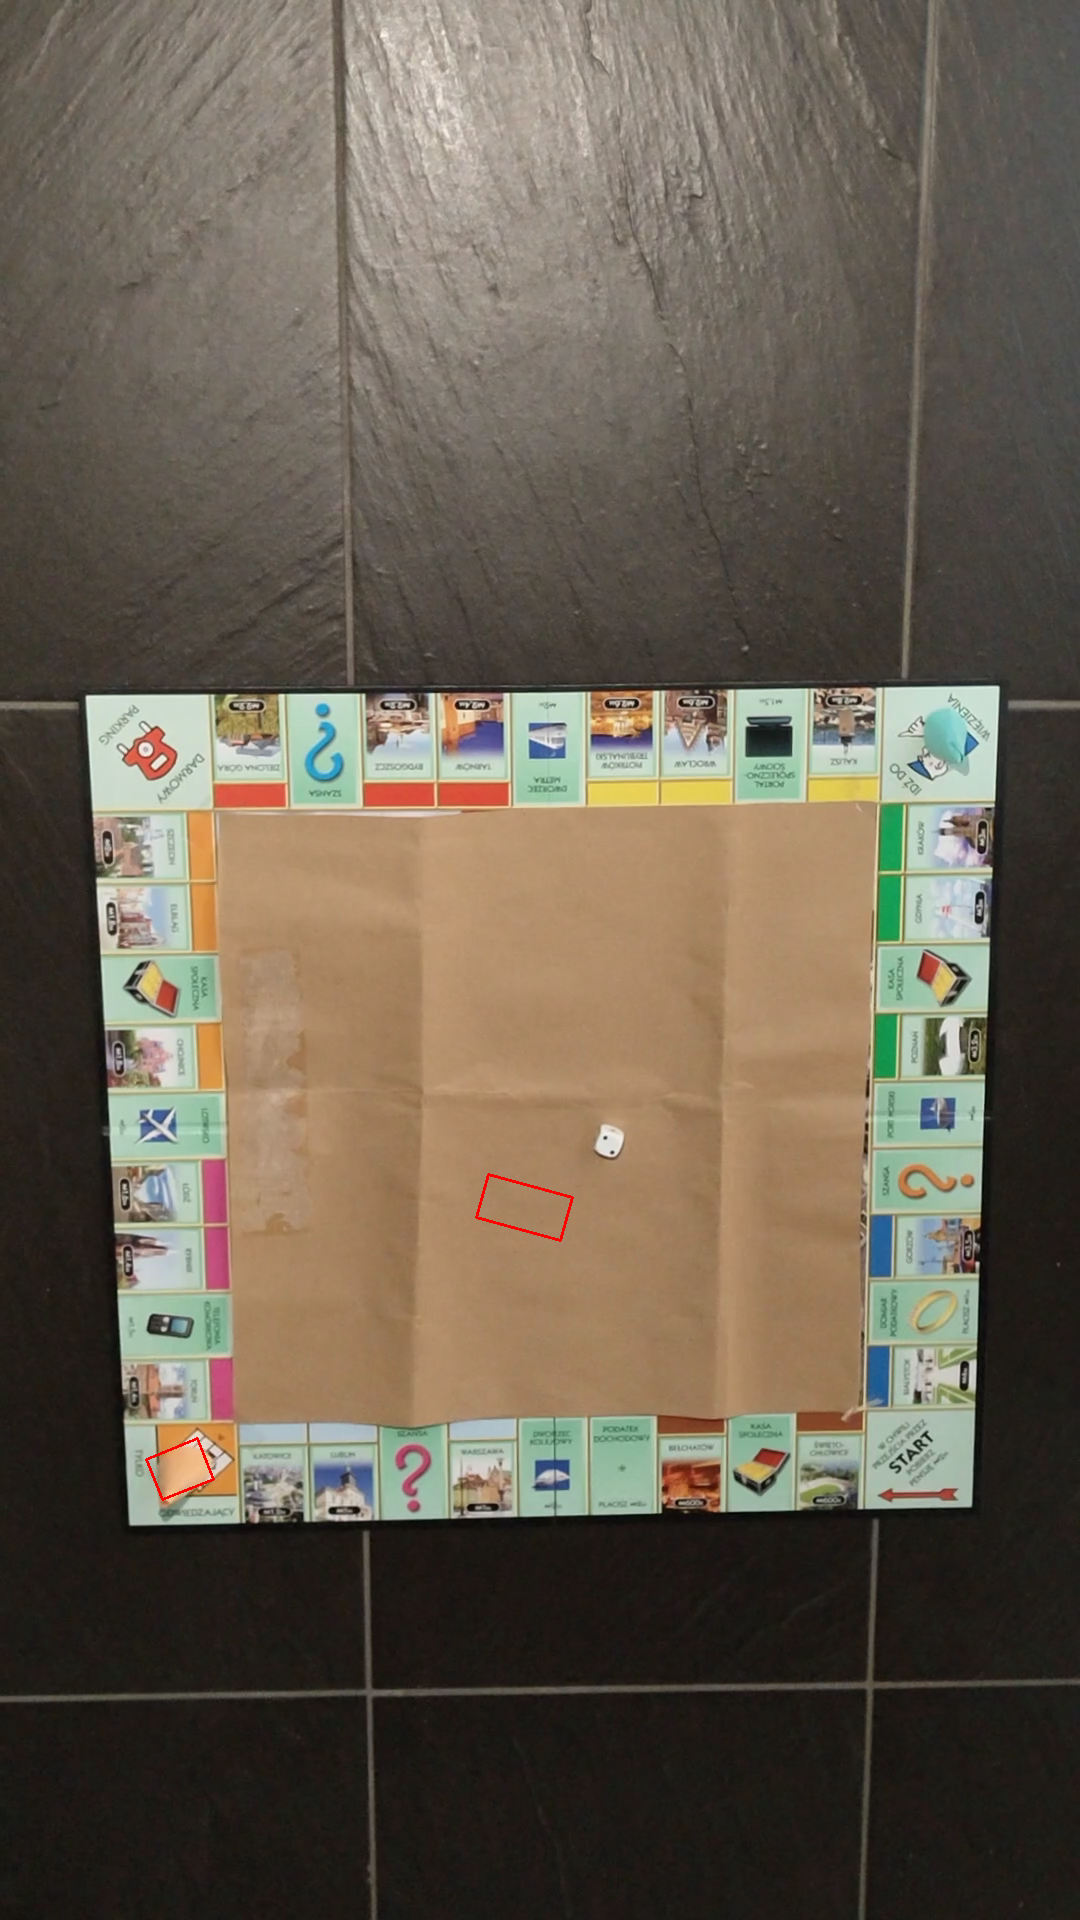

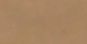

(476, 1174, 96, 66)


In [22]:
mvideo = cv2.VideoCapture('process/3_hard.mp4')
ret, CALIB_FRAME = mvideo.read()
mvideo = cv2.VideoCapture('process/3_hard.mp4')
mvideo.set(cv2.CAP_PROP_POS_FRAMES, 0)

ret, frame = mvideo.read()
CALIB_CROP =  CALIB_FRAME[1460:1490, 158:188]
# CALIB_CROP = CALIB_FRAME[565:585, 150:175]
# new_calib = (158, 1460, 30, 30)
imshow(CALIB_CROP)
# draw_bbox(CALIB_FRAME, new_calib, (0, 255, 255))
# imshow(CALIB_FRAME)
min_h, max_h = thresholds_for_crop(CALIB_CROP)   

lower_col = np.array(min_h, np.uint8)
upper_col = np.array(max_h, np.uint8)
mask = mask_color(frame, lower_col ,upper_col)
imshow(mask)
contours, mask2_ = filter_for_counter(mask, 1600, 2400)
# imshow(mask2_)
counter_crop, box = find_counter(frame, contours, 0)

ret, frame = mvideo.read()
with_rectangles = draw_rectangle_from_contours(frame, contours)
imshow(with_rectangles)
counter_crop, box = find_counter(frame,contours)
imshow(counter_crop)
cv_box = corners_to_cvbbox(box)
print(cv_box)

final_box = approximate_cvbbox(corners_to_cvbbox(box), 5)

In [11]:
mvideo = cv2.VideoCapture('process/3_easy.mp4')
if mvideo.isOpened():
    print('Video loaded')

mvideo_width = int(mvideo.get(3))
mvideo_height = int(mvideo.get(4))

print(mvideo_height, mvideo_width)

mvideo_fps = mvideo.get(cv2.CAP_PROP_FPS)
print(mvideo_fps)

Video loaded
1920 1080
29.782775466405617


In [12]:
stop

NameError: name 'stop' is not defined

In [ ]:
FULLHD = True

# P A R A M E T E R S 1080p
# 5_easy - orangeL,U - 1600, 2800; 3_medium - orangeL,U - 2400, 3000 
if FULLHD:
  mvideo = cv2.VideoCapture('process/3_easy.mp4')
  mvideo.set(cv2.CAP_PROP_POS_FRAMES, 0)
  ret, CALIB_FRAME = mvideo.read()
  
  BOXES_DISTANCE = 50
  appx=5
  # 3_eazy orangeU=3000
  # orangeCalib = CALIB_FRAME[565:585, 150:175]
  # 3_hard
  orangeCalib = CALIB_FRAME[1460:1490, 158:188]
  # 5_hard orangeL,U= 1600, 2400
  orangeL = 1600
  orangeU = 2400
  greenCalib = CALIB_FRAME[1375:1390, 850:865]
  greenL = 10
  greenU = 1400
  
  mvideo = cv2.VideoCapture('process/3_hard.mp4')
  mvideo.set(cv2.CAP_PROP_POS_FRAMES, 0)
  ret, FIRST_FRAME = mvideo.read()
  
  

# P A R A M E T E R S 480p - WILL NOT BE USED
# else:
#   mvideo = cv2.VideoCapture('quality_480/3_easy.mp4')
#   mvideo.set(cv2.CAP_PROP_POS_FRAMES, 0)
#   ret, CALIB_FRAME = mvideo.read()
  
#   BOXES_DISTANCE = 10
#   appx=2
#   orangeCalib = CALIB_FRAME[337:340, 228:235]
#   orangeL = 10
#   orangeU = 70
#   greenCalib = CALIB_FRAME[130:140, 55:60]
#   greenL = 10
#   greenU = 50

playerO_bbox, cropO_ = get_player_box(FIRST_FRAME, orangeCalib, orangeL, orangeU, inv=0, approx=appx)
# playerG_bbox, cropG_ = get_player_box(FIRST_FRAME, greenCalib, greenL, greenU, inv=1, approx=10)

playerO_tracker = create_tracker('MIL')
# playerG_tracker = create_tracker('MIL')

if playerO_tracker.init(frame, playerO_bbox):
  print('Player tracking algorithm initiated at point:', playerO_bbox)

# if playerG_tracker.init(frame, playerG_bbox):
  # print('Player2 tracking algorithm initiated at point:', playerG_bbox)

mvideo_track = cv2.VideoWriter('./counters_tempname.avi', cv2.VideoWriter_fourcc(*'DIVX'), mvideo_fps, (mvideo_width, mvideo_height))

mvideo.set(cv2.CAP_PROP_POS_FRAMES, 0)

_ = 0
flagO = 0
flagG = 0
good = 0
bad = 0
v_bad = 0
while mvideo.isOpened():
    ret, frame = mvideo.read()

    if ret:
      ok, bboxO = playerO_tracker.update(frame)
      if ok: draw_bbox(frame, bboxO, (0, 255, 0))

      # ok, bboxG = playerG_tracker.update(frame)
      # if ok: draw_bbox(frame, bboxG, (0, 255, 0))
      
      if _ % 10:
        try:
          det_boxO = get_player_box(frame, orangeCalib, orangeL, orangeU, inv=0, approx=appx)
          # det_boxG = get_player_box(frame, greenCalib, greenL, greenU, inv=1, approx=10)
          
          if ((bboxO[0] - det_boxO[0])**2 + (bboxO[1] - det_boxO[1])**2) ** 0.5 < 50:
            bad += 1
            if flagO == 1:
              ok, bboxO = playerO_tracker.update(frame, det_boxO)
              if ok: draw_bbox(frame, bboxO, (0, 255, 255))
              flagO = 0
            else: flagO = 1
            
          # if ((bboxG[0] - det_boxG[0])**2 + (bboxG[1] - det_boxG[1])**2) ** 0.5 > BOXES_DISTANCE:
          #   bad += 1
          #   if flagG == 1:
          #     ok, bboxG = playerG_tracker.update(frame, det_boxG)
          #     if ok: draw_bbox(frame, bboxG, (0, 255, 255))
          #     flagG = 0
          #   else: flagG = 1

          else:
            good += 1
            draw_bbox(frame, bboxO, (0, 255, 255))
            # draw_bbox(frame, bboxG, (0, 255, 255))
            imshow(frame)
        except: v_bad += 1

      mvideo_track.write(frame)
      _ += 1
      
      if _ == 600:
        print(good, bad, v_bad)
        break
      
    else:
        break

mvideo_track.release()

0 0 540


In [ ]:
stop

NameError: name 'stop' is not defined

### COUNTING HOUSES

debug cell for find_houses

In [ ]:
# mvideo = cv2.VideoCapture('process/4_easy.mp4')
# if mvideo.isOpened():
#     print('Video loaded')

# mvideo_width = int(mvideo.get(3))
# mvideo_height = int(mvideo.get(4))

# print(mvideo_height, mvideo_width)

# mvideo_fps = mvideo.get(cv2.CAP_PROP_FPS)
# print(mvideo_fps)

# # C A L I B R A T I O N
# mvideo.set(cv2.CAP_PROP_POS_FRAMES, 630)
# ret, CALIB_FRAME = mvideo.read()

# # CALIB_CROP =  CALIB_FRAME[1460:1490, 158:188]
# CALIB_CROP = CALIB_FRAME[1175:1185, 195:208]
# # new_calib = (188, 1175, 20, 10)
# imshow(CALIB_CROP)
# # draw_bbox(CALIB_FRAME, new_calib, (0, 255, 255))
# # imshow(CALIB_FRAME)
# min_h, max_h = thresholds_for_crop(CALIB_CROP)   
# lower_col = np.array(min_h, np.uint8)
# upper_col = np.array(max_h, np.uint8)

# # D E T E C T I O N
# mvideo = cv2.VideoCapture('process/5_easy.mp4')
# mvideo.set(cv2.CAP_PROP_POS_FRAMES, 1060)
# ret, frame = mvideo.read()

# mask = mask_color(frame, lower_col ,upper_col)
# # imshow(mask)
# contours, mask2_ = filter_for_house(frame, mask, 150, 550, 360)
# # imshow(mask2_)

# ret, frame = mvideo.read()
# with_rectangles = draw_rectangle_from_contours(frame, contours)
# imshow(with_rectangles)

In [ ]:
# mvideo = cv2.VideoCapture('process/4_easy.mp4')
# if mvideo.isOpened():
#     print('Video loaded')

# mvideo_width = int(mvideo.get(3))
# mvideo_height = int(mvideo.get(4))

# print(mvideo_height, mvideo_width)

# mvideo_fps = mvideo.get(cv2.CAP_PROP_FPS)
# print(mvideo_fps)

# mvideo.set(cv2.CAP_PROP_POS_FRAMES, 630)
# ret, CALIB_FRAME = mvideo.read()

# CALIB_CROP = CALIB_FRAME[1175:1185, 188:208]
# MIN_AREA = 150
# MAX_AREA = 550
# EPSILON = 400

# houses = find_houses(CALIB_FRAME, CALIB_CROP, MIN_AREA, MAX_AREA, EPSILON)
# # imshow(draw_houses_frame(CALIB_FRAME, houses))

saving video with detecting houses

In [ ]:
# P A R A M E T E R S 1080p
mvideo = cv2.VideoCapture('process/4_easy.mp4')
if mvideo.isOpened():
    print('Video loaded')

mvideo_fps = mvideo.get(cv2.CAP_PROP_FPS)

mvideo.set(cv2.CAP_PROP_POS_FRAMES, 630)
ret, CALIB_FRAME = mvideo.read()

CALIB_CROP = CALIB_FRAME[1175:1185, 195:208]
MIN_AREA = 150
MAX_AREA = 750
EPSILON = 450

# 4_easy config: calib_bounds, min,max,epsilon: [1175:1185, 195:208] works fine, 150, 750, 450
# 5_easy config: calib_bounds, min,max,epsilon: [1175:1185, 195:208], 150, 650, 360
######################################
  
mvideo = cv2.VideoCapture('process/4_easy.mp4')
mvideo.set(cv2.CAP_PROP_POS_FRAMES, 0)

mvideo_track = cv2.VideoWriter('./houses_tempname.avi', cv2.VideoWriter_fourcc(*'DIVX'), mvideo_fps, (mvideo_width, mvideo_height))

mvideo.set(cv2.CAP_PROP_POS_FRAMES, 0)

_ = 0
while mvideo.isOpened():
    ret, frame = mvideo.read()

    if ret:      
      try:
        houses = find_houses(frame, CALIB_CROP, MIN_AREA, MAX_AREA, EPSILON)
        frame = draw_houses_frame(frame, houses)
      except: pass

      mvideo_track.write(frame)
      _ += 1
      
      # if _ == 600:
      #   break
      
    else:
        break

mvideo_track.release()

Video loaded
1920 1080
30.0


In [ ]:
stop

## COMBINED COUNTER + HOUSES

In [13]:
# # # CALIBRATION # # #

# COUNTER PARAMETERS
# 5_easy - orangeL,U - 1600, 2800; 3_medium - orangeL,U - 2400, 3000 
mvideo = cv2.VideoCapture('process/3_easy.mp4')
mvideo.set(cv2.CAP_PROP_POS_FRAMES, 0)
ret, CALIB_FRAME = mvideo.read()
 
BOXES_DISTANCE = 50
STABLE_PERIOD_C = 15
MOVE_EPSILON = 50
STABLE_EPSILON_C = 50
distances_c = []
stable_counter_c = 0
moving = False
appx=5
# 3_eazy orangeU=3000
orangeCalib = CALIB_FRAME[565:585, 150:175]
# 3_hard
# orangeCalib = CALIB_FRAME[1460:1490, 158:188]
# 5_hard orangeL,U= 1600, 2400
orangeL = 1700
orangeU = 3000
last_box = None
flagO = 0


# HOUSES PARAMETERS
mvideo = cv2.VideoCapture('process/4_easy.mp4')
if mvideo.isOpened():
    print('Video loaded')

mvideo_fps = mvideo.get(cv2.CAP_PROP_FPS)

mvideo.set(cv2.CAP_PROP_POS_FRAMES, 630)
ret, CALIB_FRAME = mvideo.read()

CALIB_CROP = CALIB_FRAME[1175:1185, 195:208]
MIN_AREA = 150
MAX_AREA = 650
EPSILON = 360
STABLE_PERIOD_H = 90
houses_counter = 0
placing = False
stable_counter_h = 0

# 4_easy config: calib_bounds, min,max,epsilon: [1175:1185, 195:208] works fine, 150, 750, 450
# 5_easy config: calib_bounds, min,max,epsilon: [1175:1185, 195:208], 150, 650, 360


# TESTING VIDEO

mvideo = cv2.VideoCapture('process/5_easy.mp4')
mvideo.set(cv2.CAP_PROP_POS_FRAMES, 0)
ret, FIRST_FRAME = mvideo.read()

# SETTING TRACKER
playerO_bbox, cropO_ = get_player_box(FIRST_FRAME, orangeCalib, orangeL, orangeU, inv=0, approx=appx)
playerO_tracker = create_tracker('MIL')

if playerO_tracker.init(frame, playerO_bbox):
  print('Player tracking algorithm initiated at point:', playerO_bbox)

mvideo_track = cv2.VideoWriter('./combo_ch.avi', cv2.VideoWriter_fourcc(*'DIVX'), mvideo_fps, (mvideo_width + 800, mvideo_height))

mvideo.set(cv2.CAP_PROP_POS_FRAMES, 0)

# flags
_ = 0
while mvideo.isOpened():
    ret, frame = mvideo.read()

    if ret:
      
      # black strip for info
      strip_width = 800
      frame = cv2.copyMakeBorder(frame, 0, 0, 0, strip_width, cv2.BORDER_CONSTANT, value=(0,0,0))
      
      # updating tracker bbox
      ok, bboxO = playerO_tracker.update(frame)
      if ok: draw_bbox(frame, bboxO, (0, 255, 0))
      if _ == 0:
        last_box = bboxO
      # counter detection (fails)
      if _ % 10:
        try:
          det_boxO = get_player_box(frame, orangeCalib, orangeL, orangeU, inv=0, approx=appx)
          
          if distance_between_boxes(bboxO, det_boxO) > 50:
            if flagO == 1:
              ok, bboxO = playerO_tracker.update(frame, det_boxO)
              if ok: draw_bbox(frame, bboxO, (0, 255, 255))
              flagO = 0
            else: flagO = 1

          else:
            draw_bbox(frame, bboxO, (0, 255, 255))
        
        except: pass

      # checking if counter moved
      # if _% 2:
      frame, moving, stable_counter_c = check_if_counter_moved(frame, last_box, bboxO, MOVE_EPSILON, STABLE_EPSILON_C, STABLE_PERIOD_C, stable_counter_c, moving)
      last_box = bboxO
        
      # house detection
      try:
        houses = find_houses(frame, CALIB_CROP, MIN_AREA, MAX_AREA, EPSILON)
        frame = draw_houses_frame(frame, houses)
        frame, placing, stable_counter_h, houses_counter = check_if_house_placed(frame, len(houses), houses_counter, STABLE_PERIOD_H, stable_counter_h, placing)
      except: pass
      
      mvideo_track.write(frame)
      _ += 1
      if _ == 200:
        break
      
    else:
        break
mvideo_track.release()

Video loaded
1080


In [ ]:
stop

### TRYING TO FIND DICE

In [ ]:
def cut_bbox(frame, contour, warp = True):
    if warp:
        rect = cv2.minAreaRect(contour)
        
        box = cv2.boxPoints(rect)
        box = np.int0(box)

        # get width and height of the detected rectangle
        width = int(rect[1][0])
        height = int(rect[1][1])

        src_pts = box.astype("float32")
        # coordinate of the points in box points after the rectangle has been
        # straightened
        dst_pts = np.array([[0, height-1],
                            [0, 0],
                            [width-1, 0],
                            [width-1, height-1]], dtype="float32")

        # the perspective transformation matrix
        M = cv2.getPerspectiveTransform(src_pts, dst_pts)

        # directly warp the rotated rectangle to get the straightened rectangle
        return cv2.warpPerspective(frame, M, (width, height))
    else:
        rect = cv2.boundingRect(contour)
        return frame[rect[1]:rect[1]+rect[3], rect[0]:rect[0]+rect[2]]


Video loaded
480 270
30.0


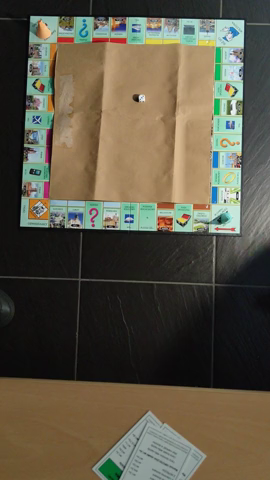

In [ ]:
mvideo = cv2.VideoCapture('quality_480/5_medium.mp4')
if mvideo.isOpened():
    print('Video loaded')

mvideo_width = int(mvideo.get(3))
mvideo_height = int(mvideo.get(4))

print(mvideo_height, mvideo_width)

mvideo_fps = mvideo.get(cv2.CAP_PROP_FPS)
print(mvideo_fps)
mvideo.set(cv2.CAP_PROP_POS_FRAMES, 0)
ret, frame = mvideo.read()

imshow(frame)


finding rectangles with contours example

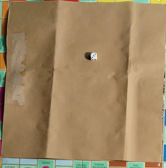

In [ ]:
def find_brown_space(frame):
    
    lower = np.array([12, 35, 30], np.uint8)
    upper = np.array([18, 255, 255], np.uint8)
    mask = mask_color(frame, lower, upper)
    contours, _ = cv2.findContours(
        mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for c in contours:

        area = cv2.contourArea(c) 
        if area > 22000:
          return [c]     
          
    # while len(contours) > n:
    #     mask = cv2.erode(mask, np.ones((3, 3)))
    #     contours, _ = cv2.findContours(
    #         mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours

contours = find_brown_space(frame)
rectangle = cut_bbox(frame,contours[0],False)
imshow(rectangle)


In [ ]:
def find_possible_dice_positions(rectangle):
        lower_white = np.array([0,0,188])
        upper_white = np.array([172,111,255])
        gray = cv2.cvtColor(rectangle, cv2.COLOR_BGR2GRAY)
        th, threshed = cv2.threshold(
                gray, 150, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(
                threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        new_c = []
        for c in contours:

                area = cv2.contourArea(c) 
                if 100> area > 20:
                        rect = cv2.boundingRect(c)
                        new_c.append(rect)   
        return new_c
boxes = find_possible_dice_positions(rectangle)
boxes

[(88, 111, 8, 7), (124, 85, 9, 6), (3, 39, 8, 11)]

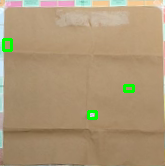

In [ ]:
for bbox in boxes:
    draw_bbox(rectangle, bbox, (0, 255, 0))
imshow(rectangle)

In [ ]:
mvideo = cv2.VideoCapture('quality_480/3_easy.mp4')
WARMUP_PERIOD = 5
i = 0
trackers = []
while (True):
   

    # Grab the latest image from the video feed
    ret, frame = mvideo.read()
    i+=1
    contours = find_brown_space(frame)
    rectangle = cut_bbox(frame,contours[0],False)


    if i == WARMUP_PERIOD:
        
        boxes = find_possible_dice_positions(rectangle)
        for box in boxes:
            dice_tracker = create_tracker('MIL')
            if dice_tracker.init(rectangle, box):
                trackers.append(dice_tracker) 
                print(dice_tracker) 
        #imshow(rectangle)
        #break
        print(len(trackers))
        if len(trackers) == 0:
            # cos nie dziala
            break
            
    new_r = rectangle.copy()
    if i > WARMUP_PERIOD:
        for tracker in trackers:
            ok, bbox = dice_tracker.update(rectangle)
            if ok:
                draw_bbox(new_r, bbox, (0, 255, 0))

    cv2.imshow('frame', new_r)

    res = cv2.waitKey(1)

    # Stop if the user presses "q"
    if res & 0xFF == ord('q'):
        break




0


In [ ]:
def draw_rectangle_from_contours(source_img, contours):
    drawing = source_img.copy()
    dice_contour = None
    for i in range(len(contours)):

        rect = cv2.minAreaRect(contours[i])
        box = cv2.boxPoints(rect)
        box = np.int0(box)

        cv2.drawContours(drawing, [box], 0, (0, 0, 255), 2)
    return drawing


In [ ]:
def find_dice_count(dice_crop):
    dice_gray = cv2.cvtColor(dice_crop, cv2.COLOR_BGR2GRAY)
    th, threshed = cv2.threshold(
        dice_gray, 100, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    cnts = cv2.findContours(threshed, cv2.RETR_LIST,
                            cv2.CHAIN_APPROX_SIMPLE)[-2]
    #draw = dice_gray.copy()
    n = 0

    ####################################################
    # !!!!!!!!!! THIS FAILS IF TWO SIDES VISIBLE !!!!!!!
    ####################################################
    # imshow(cv2.Canny(dice_gray,100,200))
    # rect = cv2.minAreaRect(cnts[6])
    # box = cv2.boxPoints(rect)
    # box = np.int0(box)

    # # get width and height of the detected rectangle
    # width = int(rect[1][0])
    # height = int(rect[1][1])

    # src_pts = box.astype("float32")
    # # coordinate of the points in box points after the rectangle has been
    # # straightened
    # dst_pts = np.array([[0, height-1],
    #                     [0, 0],
    #                     [width-1, 0],
    #                     [width-1, height-1]], dtype="float32")

    # # the perspective transformation matrix
    # M = cv2.getPerspectiveTransform(src_pts, dst_pts)

    # # directly warp the rotated rectangle to get the straightened rectangle
    # warped = cv2.warpPerspective(threshed, M, (width, height))

    for cnt in cnts:
        if 7 < cv2.contourArea(cnt) < 40:
            n += 1
    #     #print(cnt)
    #     cv2.drawContours(draw,cnt,n,(0,0,255))
    # imshow(warped)
    return n


find_dice_count(dice_crop)


5

whole transformation

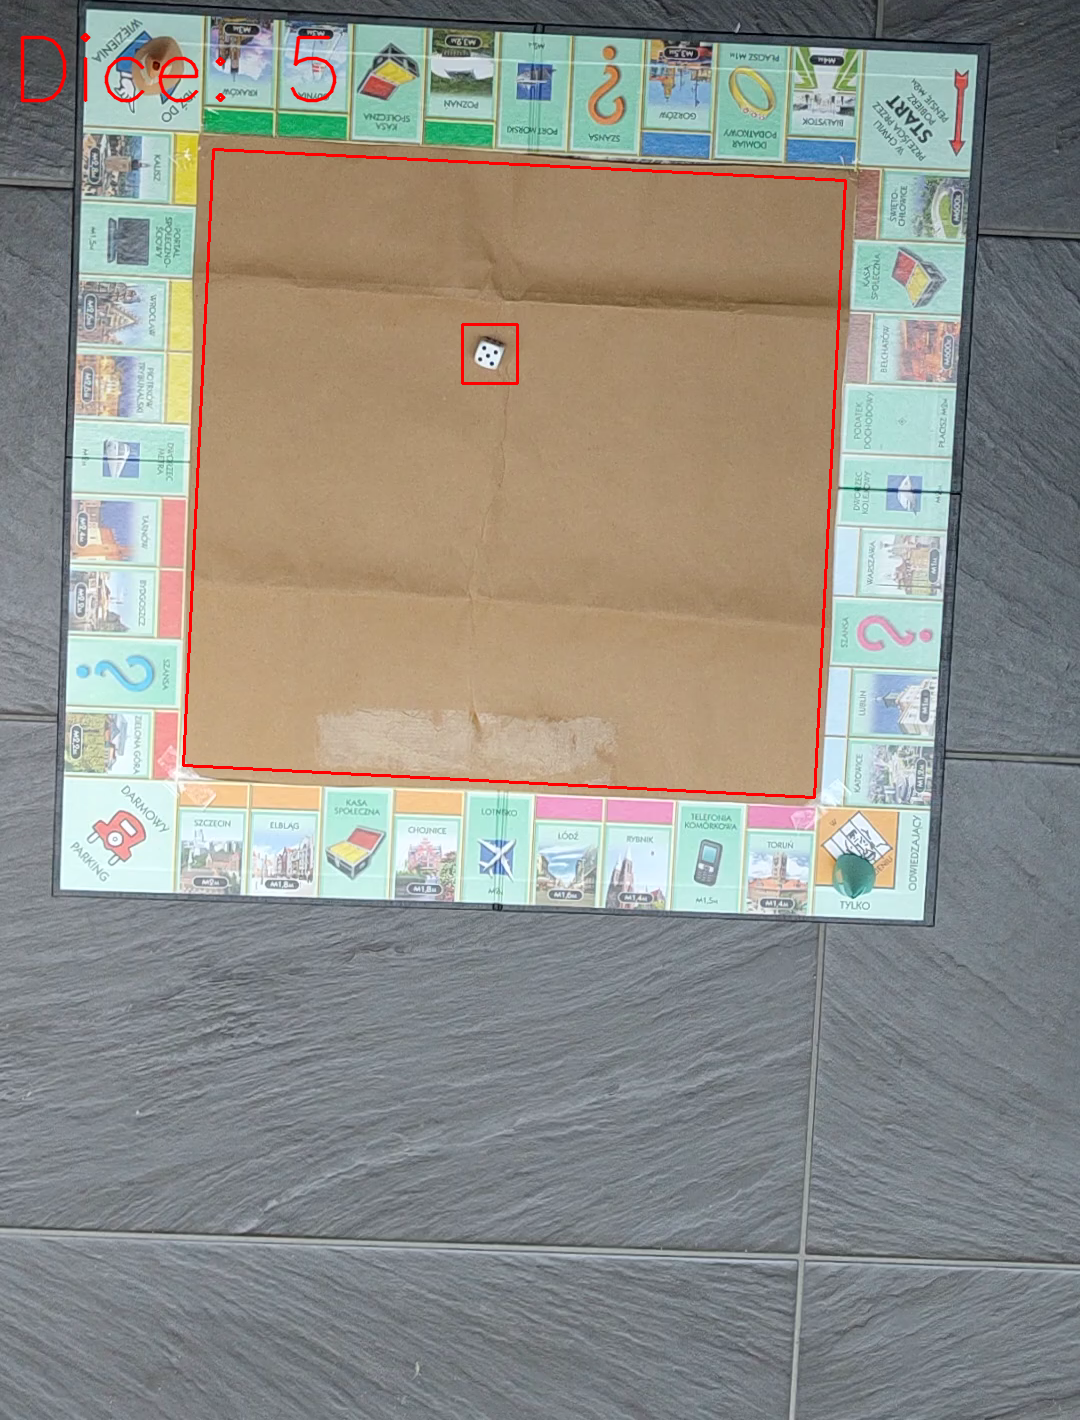

In [ ]:
# def find_bbox_dice(frame):
#     lower = np.array([13, 45, 139], np.uint8)
#     upper = np.array([21, 140, 230], np.uint8)
#     mask = mask_color(frame, lower, upper)
#     contours, mask = find_contiguous_spaces(mask, 2)
#     drawn = draw_rectangle_from_contours(frame, contours)
#     dice_crop, box = find_dice_crop_image(frame, contours)
#     num = find_dice_count(dice_crop)
#     cv2.putText(drawn, f"Dice: {num}", (10, 100),
#                 cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), 2, cv2.LINE_AA)
#     return drawn


# imshow(find_bbox_dice(frame))


finding cards

In [ ]:

def find_cards(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    threshed = cv2.adaptiveThreshold(cv2.blur(gray, (3, 3)), 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                     cv2.THRESH_BINARY, 15, 0)
    contours, hierarchy = cv2.findContours(
        threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE,)

    MIN_AREA = 600
    MAX_AREA = 5000
    result = frame.copy()
    cards = []
    CARD_ASPECT = 0.58
    ASPECT_SENSITIVITY = 0.1
    ARC_DIFFERENCE_SENSITIVITY = 10
    for c, h in zip(contours, hierarchy[0]):

        area = cv2.contourArea(c)
        approx = cv2.approxPolyDP(c, 0.05*cv2.arcLength(c, True), True)
        convexHull = cv2.convexHull(approx)

        if h[3] == -1 and len(approx) == 4 and MAX_AREA > area > MIN_AREA:

            try:
                convexityDefects = cv2.convexityDefects(
                    approx, cv2.convexHull(approx, returnPoints=False))
                if convexityDefects:
                    continue
            except:
                continue

            rect = cv2.minAreaRect(c)

            # get width and height of the detected rectangle
            width = int(rect[1][0])
            height = int(rect[1][1])

            if abs(cv2.arcLength(c, True) - (width*2+height*2)) < ARC_DIFFERENCE_SENSITIVITY:

                # if its aspect ratio is more or less the card ratio xD
                if abs(width/height - CARD_ASPECT) < ASPECT_SENSITIVITY or abs(height/width - CARD_ASPECT) < ASPECT_SENSITIVITY:
                    cards.append(approx)
    return cards





In [ ]:
def draw_card_frame(frame, cards):
    new_frame = draw_rectangle_from_contours(frame, cards)
    cv2.putText(new_frame, f"{len(cards)}", (10, 100),
                cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), 2, cv2.LINE_AA)
    return new_frame

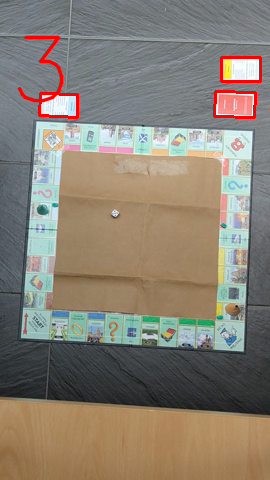

In [ ]:
cards = find_cards(frame)
imshow(draw_card_frame(frame, cards))

In [ ]:
#CREDIT: https://adamspannbauer.github.io/2018/03/02/app-icon-dominant-colors/
from sklearn.cluster import KMeans
from collections import Counter
def get_dominant_color(image, k=4, image_processing_size = None):
   
    #reshape the image to be a list of pixels
    image = image.reshape((image.shape[0] * image.shape[1], 3))

    #cluster and assign labels to the pixels 
    clt = KMeans(n_clusters = k)
    labels = clt.fit_predict(image)

    #count labels to find most popular
    label_counts = Counter(labels)

    #subset out most popular centroid
    dominant_color = clt.cluster_centers_[label_counts.most_common(1)[0][0]]

    return list(dominant_color)

In [ ]:
def find_mortgage(frame,cards):
    mortgaged = []
    for i,card in enumerate(cards):
       # im,bbox = find_dice_crop_image(frame, card)

        rect = cv2.minAreaRect(card)
        box = cv2.boxPoints(rect)
        box = np.int0(box)

        # get width and height of the detected rectangle
        width = int(rect[1][0])
        height = int(rect[1][1])

        src_pts = box.astype("float32")
        # coordinate of the points in box points after the rectangle has been
        # straightened
        dst_pts = np.array([[0, height-1],
                            [0, 0],
                            [width-1, 0],
                            [width-1, height-1]], dtype="float32")

        # the perspective transformation matrix
        M = cv2.getPerspectiveTransform(src_pts, dst_pts)

        # directly warp the rotated rectangle to get the straightened rectangle
        warped = cv2.warpPerspective(frame, M, (width, height))
        hsv = cv2.cvtColor(warped, cv2.COLOR_BGR2HSV)
        dominant_hue = get_dominant_color(hsv)[0]
        print(dominant_hue)
        if 20 > dominant_hue > 0 or dominant_hue > 160 :
            mortgaged.append(i)
        imshow(warped)
    return mortgaged
mortgaged = find_mortgage(frame,cards)
print(mortgaged)

79.01836393989977


29.644189383070298


0.2869822485208573


[2]


In [ ]:
mvideo = cv2.VideoCapture('quality_480/5_medium.mp4')
while (True):
    # Grab the latest image from the video feed
    ret, frame = mvideo.read()
    ret, frame = mvideo.read()
    frame = frame  # [500:]
    cards = find_cards(frame)
    drawing = draw_card_frame(frame, cards)

   # if n ==2:
    # imshow(drawing)
    #    break
    cv2.imshow('frame', drawing)

    res = cv2.waitKey(1)

    # Stop if the user presses "q"
    if res & 0xFF == ord('q'):
        break


finding hsv bounds for frame cropped img

In [ ]:
hsv = cv2.cvtColor(frame[700:-700, 300:-400], cv2.COLOR_BGR2HSV)
min_h, max_h = np.min(hsv, axis=(0, 1)), np.max(hsv, axis=(0, 1))
print(min_h, max_h)


[ 13  45 147] [ 21 138 230]
